DSR Base Assignment - Arden Viljoen

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [180]:
dataset=pd.read_csv("C:/Users/Arden Viljoen/Desktop/Dataset.csv")
dataset.head(5)

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600,10.268,16.932,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501,11.032,16.422,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200,3.044,7.356,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020,4.335,8.303,232409,167359,320548
4,West Coast,DC1,Survey,2.700,0.000,5.444,11302,0,22789


## Question: What is the total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate?

In [181]:
data1 = dataset.loc[dataset["Estimate"] != "Fay-Heriott"]

In [182]:
data1.head(5)

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600,10.268,16.932,102437,77340,127534
2,City of Cape Town,CPT,Survey,5.200,3.044,7.356,200751,117517,283985
4,West Coast,DC1,Survey,2.700,0.000,5.444,11302,0,22789
6,Cacadu,DC10,Survey,7.600,3.484,11.716,34732,15922,53542
8,Amatole,DC12,Survey,11.000,7.276,14.724,98884,65407,132361


In [183]:
df1 = pd.DataFrame(data1)
df1['Total'] = df1['NoPLHIV'].sum() 
print(df1[['District', 'NoPLHIV','Total']])
 

                      District  NoPLHIV    Total
0                 Buffalo City   102437  6409903
2            City of Cape Town   200751  6409903
4                   West Coast    11302  6409903
6                       Cacadu    34732  6409903
8                      Amatole    98884  6409903
10                  Chris Hani   114849  6409903
12                   Joe Gqabi    37766  6409903
14                  O.R. Tambo   160352  6409903
16                     Xhariep    11777  6409903
18               Lejweleputswa   123868  6409903
20          Thabo Mofutsanyana   115006  6409903
22              Cape Winelands    30706  6409903
24                 Fezile Dabi    45550  6409903
26                         Ugu   142979  6409903
28               uMgungundlovu   221073  6409903
30                    uThukela   118124  6409903
32                  uMzinyathi    93587  6409903
34                     Amajuba    82210  6409903
36                    Zululand   171411  6409903
38                uM

## Question: What is the average NoPLHIV of the two estimates used for “Xhariep”?

In [184]:
data2 = dataset.loc[dataset["District"] == "Xhariep"]


df2 = pd.DataFrame(data2)
print(df2[['District', 'NoPLHIV']])



   District  NoPLHIV
16  Xhariep    11777
17  Xhariep    12718


In [185]:
Average=(11777+12718)/2
print(Average)


12247.5


## Question: Add a column and populate it with the number of people not living with HIV for each row. 

In [186]:
df3 = pd.DataFrame(dataset)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [187]:
df3["Multiplier"] = (100/df3["Prevalence_%"]) 
df3["TotalHIV"] = df3["Multiplier"]*df3["NoPLHIV"]
df3["NoNLHIV"] = df3["TotalHIV"]-df3["NoPLHIV"]




In [188]:
df3.drop(columns=['Multiplier', 'TotalHIV'])


,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,NoNLHIV
0,Buffalo City,BUF,Survey,13.600,10.268,16.932,102437,77340,127534,650776.235
1,Buffalo City,BUF,Fay-Heriott,13.501,11.032,16.422,101693,83092,123691,651516.879
2,City of Cape Town,CPT,Survey,5.200,3.044,7.356,200751,117517,283985,3659845.154
3,City of Cape Town,CPT,Fay-Heriott,6.020,4.335,8.303,232409,167359,320548,3628178.284
4,West Coast,DC1,Survey,2.700,0.000,5.444,11302,0,22789,407290.593
...,...,...,...,...,...,...,...,...,...,...
99,Mangaung,MAN,Fay-Heriott,9.147,6.726,12.326,101520,74646,136792,1008300.581
100,Nelson Mandela Bay Metro,NMA,Survey,8.300,3.400,13.200,97459,39923,154995,1076745.819
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.054,6.129,13.180,106313,71964,154757,1067889.497
102,City of Tshwane,TSH,Survey,11.700,7.388,16.012,361450,228239,494661,2727866.239


## Question: What is the total NoPLHIV in all the cities

In [191]:
df4 = pd.DataFrame(dataset)

In [193]:
df4 = df4[df4['District'].str.contains('City|Metro')]
print(df4)

                     District Code     Estimate  Prevalence_%  Prevalence_LCL  \
0                Buffalo City  BUF       Survey        13.600          10.268   
1                Buffalo City  BUF  Fay-Heriott        13.501          11.032   
2           City of Cape Town  CPT       Survey         5.200           3.044   
3           City of Cape Town  CPT  Fay-Heriott         6.020           4.335   
96       City of Johannesburg  JHB       Survey        11.100           7.964   
97       City of Johannesburg  JHB  Fay-Heriott        11.075           8.760   
100  Nelson Mandela Bay Metro  NMA       Survey         8.300           3.400   
101  Nelson Mandela Bay Metro  NMA  Fay-Heriott         9.054           6.129   
102           City of Tshwane  TSH       Survey        11.700           7.388   
103           City of Tshwane  TSH  Fay-Heriott        11.025           8.256   

     Prevalence_UCL  NoPLHIV  NoPLHIV_LCL  NoPLHIV_UCL  Multiplier  \
0            16.932   102437        77

In [194]:

df4['Total'] = df4['NoPLHIV'].sum() 
print(df4[['District', 'NoPLHIV','Total']])

                     District  NoPLHIV    Total
0                Buffalo City   102437  2572733
1                Buffalo City   101693  2572733
2           City of Cape Town   200751  2572733
3           City of Cape Town   232409  2572733
96       City of Johannesburg   515387  2572733
97       City of Johannesburg   514241  2572733
100  Nelson Mandela Bay Metro    97459  2572733
101  Nelson Mandela Bay Metro   106313  2572733
102           City of Tshwane   361450  2572733
103           City of Tshwane   340593  2572733


##  Question: Remove all the special/non-alphabetic characters from the dataframe column names. Print the resultant field names output.

In [195]:
df5 = pd.DataFrame(dataset)
print(df5)


                     District Code     Estimate  Prevalence_%  Prevalence_LCL  \
0                Buffalo City  BUF       Survey        13.600          10.268   
1                Buffalo City  BUF  Fay-Heriott        13.501          11.032   
2           City of Cape Town  CPT       Survey         5.200           3.044   
3           City of Cape Town  CPT  Fay-Heriott         6.020           4.335   
4                  West Coast  DC1       Survey         2.700           0.000   
..                        ...  ...          ...           ...             ...   
99                   Mangaung  MAN  Fay-Heriott         9.147           6.726   
100  Nelson Mandela Bay Metro  NMA       Survey         8.300           3.400   
101  Nelson Mandela Bay Metro  NMA  Fay-Heriott         9.054           6.129   
102           City of Tshwane  TSH       Survey        11.700           7.388   
103           City of Tshwane  TSH  Fay-Heriott        11.025           8.256   

     Prevalence_UCL  NoPLHI

In [196]:
df5.columns = df5.columns.str.replace('[^a-zA-Z0-9]', '')

print("\n\n", df5)



                      District Code     Estimate  Prevalence  PrevalenceLCL  \
0                Buffalo City  BUF       Survey      13.600         10.268   
1                Buffalo City  BUF  Fay-Heriott      13.501         11.032   
2           City of Cape Town  CPT       Survey       5.200          3.044   
3           City of Cape Town  CPT  Fay-Heriott       6.020          4.335   
4                  West Coast  DC1       Survey       2.700          0.000   
..                        ...  ...          ...         ...            ...   
99                   Mangaung  MAN  Fay-Heriott       9.147          6.726   
100  Nelson Mandela Bay Metro  NMA       Survey       8.300          3.400   
101  Nelson Mandela Bay Metro  NMA  Fay-Heriott       9.054          6.129   
102           City of Tshwane  TSH       Survey      11.700          7.388   
103           City of Tshwane  TSH  Fay-Heriott      11.025          8.256   

     PrevalenceUCL  NoPLHIV  NoPLHIVLCL  NoPLHIVUCL  Multipl

## Question: Using matplotlib, plot each Prevalence confidence interval (Prevalence_UCL and Prevalence_LCL) for Districts that end in “i”; according to Fay-Herriott estimates on 1 graph. 

In [197]:
data2 = dataset.loc[dataset["Estimate"] == "Fay-Heriott"]
df6 = pd.DataFrame(data2)
df7 = df6[df6['District'].str.endswith('i')]
print(df7)

                     District  Code     Estimate  Prevalence  PrevalenceLCL  \
11                 Chris Hani  DC13  Fay-Heriott      14.081         11.181   
13                  Joe Gqabi  DC14  Fay-Heriott      11.508          9.292   
25                Fezile Dabi  DC20  Fay-Heriott      10.031          7.811   
33                 uMzinyathi  DC24  Fay-Heriott      18.098         16.845   
51                  Ehlanzeni  DC32  Fay-Heriott      15.821         12.012   
53                     Mopani  DC33  Fay-Heriott      11.295          7.921   
65  Dr Ruth Segomotsi Mompati  DC39  Fay-Heriott      11.045          8.164   
93                 Ekurhuleni   EKU  Fay-Heriott      13.679         10.647   
95                  eThekwini   ETH  Fay-Heriott      14.538         11.791   

    PrevalenceUCL  NoPLHIV  NoPLHIVLCL  NoPLHIVUCL  Multiplier    TotalHIV  \
11         17.584   113090       89801      141224       7.102  803139.976   
13         14.170    40618       32796       50013   

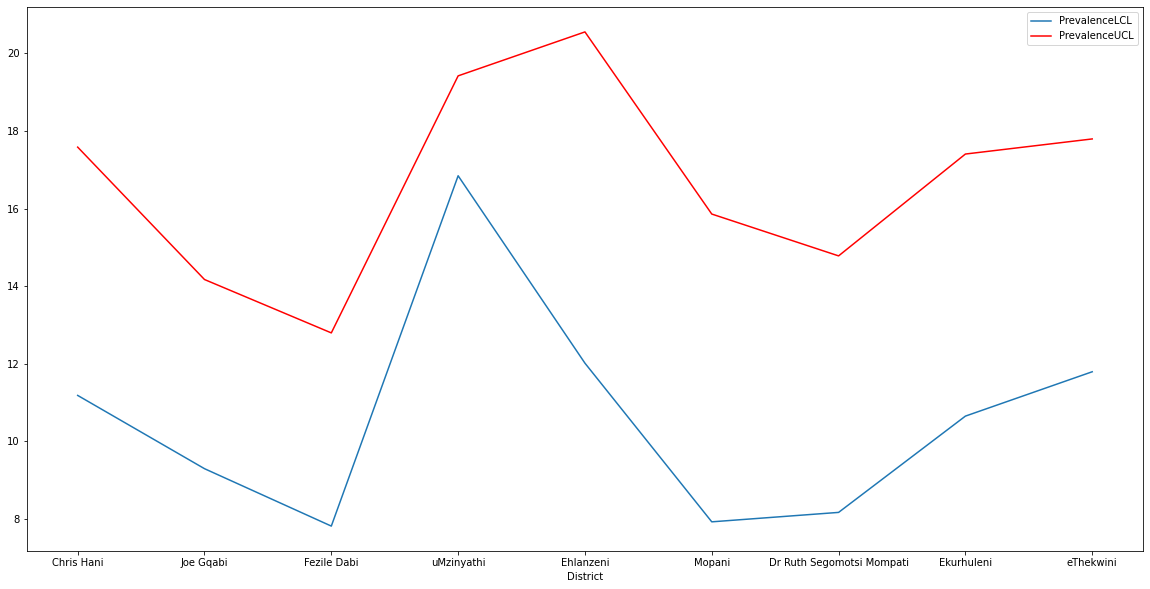

In [203]:
ax = plt.gca()
plt.rcParams["figure.figsize"] = [20, 10]

df7.plot(kind='line', x='District', y='PrevalenceLCL', ax=ax)
df7.plot(kind='line', x='District', y='PrevalenceUCL', color='red', ax=ax)

plt.show()

Total time spent on assignment: 2hr and 17 mins 